### Desafío - Inferencia de tópicos con EM

* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip

Nombres: María Eugenia Martínez; Rene Navarro; Juan Oyarce

### Descripción
* En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. Cada uno de los csv se encuentra en la carpeta dump.
* Cada csv tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras.
* En base a esta información, el objetivo del ejercicio es generar un modelo probabilístico que pueda identificar el género musical más probable dado la letra de una canción. Para ello implementaremos un modelo conocido como Latent Dirichlet Allocation que hace uso de una variante del algoritmo EM para inferir clases latentes a partir de una matriz de documentos.

### Ejercicio 1: Preparar el ambiente de trabajo
* Importe los módulos numpy , pandas , matplotlib , seaborn , glob y os siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta dump .
* Para ello genere un objeto que guarde en una lista todos los archivos alojados en dump utilizando glob.glob y os.getcwd() para extraer las rutas absolutas. Posteriormente genere un objeto pd.DataFrame que contenga todos los csv.
* Asegúrese de eliminar la columna Unnamed: 0 que se genera por defecto.

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

import os
import glob
import operator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
#creación de un dataframe con los csv separados
direction= glob.glob(os.getcwd()+'\dump\*.csv') # dirección de los archivos csv
dfList=[]
for filename in direction: # ciclo para añadir los csv a una lista de csv
    print(filename)
    df=pd.read_csv(filename, header=None)
    dfList.append(df)

C:\Users\Juan\Desafio\Modulo III\Desafíos\1.6\dump\anthrax_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.6\dump\a_tribe_called_quest_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.6\dump\black_star_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.6\dump\bob_dylan_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.6\dump\britney_spears_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.6\dump\bruce_springsteen_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.6\dump\cannibal_corpse_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.6\dump\carly_rae_jepsen_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.6\dump\deicide_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.6\dump\de_la_soul_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.6\dump\dr._dre_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.6\dump\dua_lipa_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.6\dump\eminem_scrape.csv
C:\Users\Juan\Desafio\Modulo III\De

In [3]:
concatDf=pd.concat(dfList, axis=0) #concatenacion de  la lista de csv a un dataframe
display(concatDf.shape)
namescol=["a", "grupo","genero","cancion","letra"]# nombre a las columnas del dataframe
concatDf.columns=namescol
concatDf.drop(concatDf.columns[0], axis='columns', inplace= True) #Eliminación primera "columna basura"
df=concatDf
display (df.shape)
df = df.drop(df[df['grupo']=='0'].index) #Eliminación de las falsas filas que se generan al concatenar los múltiples csv
display(df.shape)

(9551, 5)

(9551, 4)

(9489, 4)

In [4]:
df.head()

,grupo,genero,cancion,letra
1,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
2,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
3,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
4,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
5,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...


In [5]:
df['genero'].value_counts()

rock      4140
hiphop    2535
metal     1582
pop       1232
Name: genero, dtype: int64

### Ejercicio 2: Matriz de ocurrencias
* Importe la clase CountVectorizer dentro de los módulos feature_extraction.text de la librería sklearn .
* Aplique la clase para extraer las 5000 palabras más repetidas en toda la base de datos.
* Con la clase inicializada, incorpore las letras con el método fit_transform y guarde los resultados en un nuevo objeto

In [6]:
# Conteo de palabras  generales
# 1 Instanciamos un objeto CountVectorizer
count_vectorizer=CountVectorizer(stop_words='english',max_features=5000)
# 2 Implementamos los pasos fit y transform
count_vectorizer_fit = count_vectorizer.fit_transform(df['letra'])
# 3 Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names()
# 4 Extraemos frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=0)
# 5 Generamos un diccionario con ambos array: palabras y su frecuencia
words_freq_show = dict(zip(words, words_freq)) 
# 6 Ordenamos el diccionario de acuerdo a los valores con el método operator.itemgetter
words_sortedfreq=sorted(words_freq_show.items(),key=operator.itemgetter(1,0))
print(words)
print (words_sortedfreq)

['000', '10', '100', '11', '12', '15', '16', '18', '20', '2000', '22', '24', '25', '2pac', '2x', '30', '313', '36', '3x', '40', '41', '45', '4x', '50', '80', '90', '98', '99', 'aah', 'abandoned', 'able', 'aboard', 'abortion', 'absolute', 'absolutely', 'abstract', 'absurd', 'abuse', 'abyss', 'ac', 'accept', 'accident', 'account', 'ace', 'ache', 'aching', 'acid', 'act', 'actin', 'acting', 'action', 'actions', 'acts', 'actually', 'ad', 'adam', 'add', 'addict', 'addicted', 'addiction', 'admit', 'adore', 'adrenaline', 'advance', 'advertising', 'advice', 'aeroplane', 'affair', 'afford', 'afraid', 'africa', 'african', 'afro', 'aftermath', 'afternoon', 'age', 'agent', 'ages', 'aggression', 'aggressive', 'ago', 'agony', 'agree', 'ah', 'aha', 'ahead', 'ahh', 'aid', 'aids', 'aight', 'aim', 'aiming', 'ain', 'air', 'aiyo', 'aiyyo', 'ak', 'al', 'alarm', 'album', 'albums', 'alcohol', 'alert', 'ali', 'alien', 'alive', 'allah', 'alley', 'allow', 'allowed', 'almighty', 'alot', 'alright', 'altar', 'amazi

### Ejercicio 3: Entrenamiento del Modelo
* Importe sklearn.decomposition.LatentDirichletAllocation y sklearn.model_selection.GridSearchCV .
* Genere una búsqueda de grilla con los siguientes hiperparámetros:
    * n_components: [5, 10, 15] .
    * learning_decay: [0.7, 0.5] .
* Entrene la búsqueda de grilla con las letras en un formato vectorizado con CountVectorizer .
* Reporte brevemente cuál es la mejor combinación de hiperparámetros

##### Digresión: Latent Dirichlet Allocation
* Latent Dirichlet Allocatio (LDA) es un modelo probabilístico generativo basado en Inferencia Variacional EM. La principal utilidad de éste es la identificación de tópicos en un corpus de texto. 
* El proceso de inferencia se puede resumir en los siguientes pasos:
    * Cada documento dentro del corpus se puede entender como una mezcla de tópicos comunes a nivel de corpus.
    * Esta mezcla de tópicos es latente $\leadsto$ Sólo observamos los documentos registrados y sus palabras. La API de sklearn.decomposition.LatentDirichletAllocation presenta la misma funcionalidad de todo modelo de sklearn. Algunos puntos a considerar en la inicialización de la clase son:
        * n_components : Cantidad de tópicos a inferir en un corpus.
        * learning_method : Forma en la que entran los datos en entrenamiento. Cuando es 'batch' , se ingresa la matriz de entrenamiento completa. Cuando es 'online' , la matriz de entrenamiento ingresa de manera secuencial en parcelas pequeñas.
        * learning_decay : Tasa de aprendizaje en la función de pérdida. Cuando se implementa con learning_method='online', el modelo se entrena con Gradiente Estocástico Descendente.
        * Perplejidad: Busca aproximar el número óptimo de tópicos a inferir. Técnicamente evalúa qué tan bien predice una muestra específica. En funcion a un número de tópicos, define la distribución teórica de palabras representada por los tópicos y la compara con la ocurrencia empírica de palabras en tópicos

In [7]:
#generación del modelo

n_components = [5, 10, 15]

learning_decay = [0.7, 0.5]

DataGrid = GridSearchCV(LatentDirichletAllocation(learning_method='online', n_jobs=-1), param_grid={'n_components': n_components, 'learning_decay': learning_decay}, cv=3)

In [8]:
resultado = DataGrid.fit(count_vectorizer_fit)

In [9]:
#Mejor combinación de hiperparametros
resultado.best_params_

{'learning_decay': 0.7, 'n_components': 5}

{'learning_decay': 0.7, 'n_components': 5}

### Ejercicio 4 : Inferencia e Identificación de Tópicos
* En base a la mejor combinación de hiperparámetros, entrene el modelo con la matriz de atributos de las letras.
* Para identificar de qué se trata cada tópico, necesitamos identificar las principales 15 palabras asociadas con éste. Puede implementar la siguiente línea de código para identificar las principales palabras en un tópico:

```python
# mediante .components_ podemos extraer una matriz que entrega las distribución de palabras por cada tópico.

for topic_id, topic_name in enumerate(fit_best_lda.components_):
    # para cada tópico
    print("tópico: {}".format(topic_id + 1))
    # mediante argsort logramos ordenar los elementos por magnitud
    # para los elementos más relevantes ordenados por argsort, buscamos su correlativo
    # en la matriz dispersa y devolvemos el nombre.
    # finalmente concatenamos las palabras
    print(" ".join([counter.get_feature_names()[i] for i in topic_name.argsort()[:-15 - 1: -1]]))
```

* Comente a qué tópicos está asociada cada clase inferida.

In [10]:
best_lda_model = LatentDirichletAllocation(learning_method='online', n_jobs=-1, n_components=5, learning_decay=0.7).fit(count_vectorizer_fit)

In [11]:
for topic_id, topic_name in enumerate(best_lda_model.components_):
    # para cada tópico
    print("tópico: {}".format(topic_id + 1))
    # mediante argsort logramos ordenar los elementos por magnitud
    # para los elementos más relevantes ordenados por argsort, buscamos su correlativo
    # en la matriz dispersa y devolvemos el nombre.
    # finalmente concatenamos las palabras
    print(" ".join([count_vectorizer.get_feature_names()[i] for i in topic_name.argsort()[:-25 - 1: -1]]))

tópico: 1
love don ll know want baby come just make feel way girl gonna need hey say oh let cause ve ooh time yeah like tell
tópico: 2
life god die death blood dead soul world eyes time war hell pain live kill black man ll mind end fear face head light fight
tópico: 3
like shit yo nigga em fuck got niggas ain man cause ya ass bitch niggaz real big ll hit money don black come rap rock
tópico: 4
oh ve away just time day night like ll know life home la way long right world let don said got say gone heart little
tópico: 5
yeah got don know like just oh wanna ain let cause say right man ah gotta make baby good tell want ya gonna time really


### Comentar los tópicos

- Según el tipo de palabras más frecuentes el tópico 1 se corresponde con letras del género Pop, debido a que predominan palabras como amor, bebe, quiero, hazlo sentir, oh, necesito, entre otros. El tópico 2 destacan palabras como guerra, sangre, muerte, matar, Dios, mundo por lo que creemos que se ajustan al género Metal. El tópico 3 se corresponde con el Hip-Hop debido a la supremacía de palabras tales niggaz, perra, dinero, mierda, etc. El tópico 4 se refiere al rock debido a palabras como tiempo, corazon, noche, vida, saber, etc. El tópico 5 se parece mucho al rock, puede ser una mezcla entre rock-pop por el tipo de palabras, no sé, sé, baby, quiero, dejarlo, tiempo, etc.



### Ejercicio 5: Identificación de probabilidades
* En base a la información generada, es posible identificar cuales van a ser los géneros más probables de ocurrir para un artista.
* Para ello necesitamos guardar la probabilidad de cada canción en nuestra base de datos original. 
* Podemos implementar esto de la siguiente manera:
    
```python    
# generamos una transformación de los datos a distribución de tópico por palabra en el documento
fit_best_lda = best_lda.transform(transformed_feats)
# estra transformación la podemos coercionar a un dataframe de la siguiente manera
topics_for_each_doc = pd.DataFrame(
                                    # pasamos esta matriz y la redondeamos en 3 decimales
                                    np.round(fit_best_lda, 3),
                                    # agregamos un índice
                                    index=df_lyrics.index
                                    )
#agregamos identificadores de columna
topics_for_each_doc.columns = list(map(lambda x: "T: {}".format(x), range(1, best_lda.n_components + 1)))
# concatenamos las probabilidades de tópico por documento a nuestra matriz original
concatenated_df = pd.concat([df_lyrics, topics_for_each_doc], axis=1)
# argmax en la matriz de tópicos
concatenated_df['highest_topic'] = np.argmax(docs_topics.values, axis=1) + 1   

```

* Genere una matriz de correlaciones entre la probabilidad de tópicos inferidos. Comente brevemente cuales son las principales asociaciones existentes.

* Con esta nueva base de datos, identifique las probabilidades de pertenencia para un artista específico.

* Grafique la distribución de las probabilidades para algún artista en específico.

In [12]:
# generamos una transformación de los datos a distribución de tópico por palabra en el documento
fit_best_lda = best_lda_model.transform(count_vectorizer_fit)
# estra transformación la podemos coercionar a un dataframe de la siguiente manera
topics_for_each_doc = pd.DataFrame(
                                    # pasamos esta matriz y la redondeamos en 3 decimales
                                    np.round(fit_best_lda, 3),
                                    # agregamos un índice
                                    index=df.index
                                    )
#agregamos identificadores de columna
topics_for_each_doc.columns = list(map(lambda x: "T: {}".format(x), range(1, best_lda_model.n_components + 1)))
# concatenamos las probabilidades de tópico por documento a nuestra matriz original
concatenated_df = pd.concat([df, topics_for_each_doc], axis=1)
# argmax en la matriz de tópicos
concatenated_df['highest_topic'] = np.argmax(topics_for_each_doc.values, axis=1) + 1

In [25]:
concatenated_df[concatenated_df['highest_topic']==5]['genero'].value_counts('%')

rock      0.417974
hiphop    0.286020
pop       0.236091
metal     0.059914
Name: genero, dtype: float64

Text(34.0, 0.5, 'Topicos')

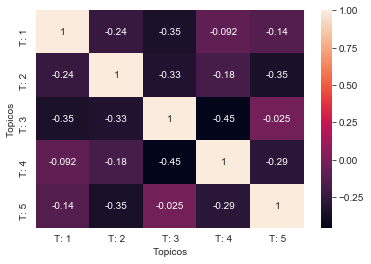

In [30]:
# Matriz de correlaciones entre tópicos

sns.heatmap(concatenated_df.drop(5).corr(), annot=True)
plt.xlabel('Topicos')
plt.ylabel('Topicos')

- La matriz muestra que las canciones poseen correlaciones negativas entre sí, siendo las mas destacables la relación inversa entre las letras de rock - hip hop; pop-hip hop; hip-hop - metal; en general las letras del hip-hop son las que más se alejan de los otros estilos.

### Probabilidades de un artista: Anthrax

In [15]:
df_anthrax = concatenated_df[concatenated_df['grupo'] == 'Anthrax']

In [17]:
df_anthrax['highest_topic'].value_counts('%')

2    0.376471
4    0.282353
5    0.158824
1    0.141176
3    0.041176
Name: highest_topic, dtype: float64

Text(0, 0.5, 'Porcentaje de probabilidad')

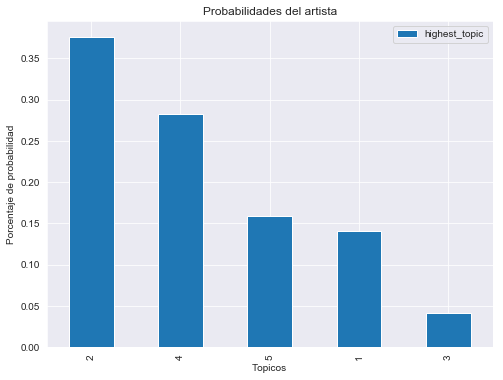

In [20]:
plt.figure(figsize=(8, 6))
df_anthrax['highest_topic'].value_counts('%').plot(kind='bar', legend='reverse')
plt.title('Probabilidades del artista')
plt.xlabel('Topicos')
plt.ylabel('Porcentaje de probabilidad')

- Se sabe que Anthrax es una banda del género Metal, podemos observar que entre las diferentes clases los tópicos de metal y rock fueron los que más predominaron en la clasificación (38 % y 28 % aprox.) por lo que el modelo funciona como clasificador de liricas. 